필요한 라이브러리 임포트

In [0]:
# 미로 찾기에 필요한 라이브러리 임포트
# 배열을 사용하기 위해서 numpy 임포트
import numpy as np
#파이썬에서 데이타를 차트로 그려주는 라이브러리 패키지 matplotlib.pyplot 임포트
import matplotlib.pyplot as plt
#notebook을 실행한 브라우저에서 차트를 볼 수 있도록 설정
%matplotlib inline

미로 그리기

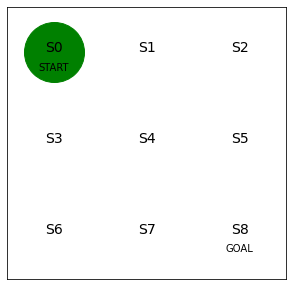

In [2]:
#plt.figure(figsize=(가로 크기,세로 크기)) : 그림의 가로 세로 설정 (단위 인치)
#그림의 가로 5인치 세로 5인치 설정
fig = plt.figure(figsize=(5, 5))

# plt.gca().set_xlim(0,3) : x좌표를 0~3으로 설정
plt.gca().set_xlim(0, 3)
#plt.gca().set_ylim(0, 3) : y좌표를 0~3으로 설정
plt.gca().set_ylim(0, 3)


#plt.text(): 그래프에 글씨를 출력하는 함수
#plt.text(글씨 x좌표, 글씨 y좌표, 출력할 글씨,
#      size="글씨사이즈 (단위 pt)", ha="정렬방법 left, right,center")
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# plt.gca().plot () : 그래프에 그림을 그림
#plt.gca().plot([그림의 x 좌표],[그림 y좌표], 
#              marker="그림모양 o 는 원 s는 사각형 d는 다이아몬드", color="그림색 g는 그린")
circle = plt.gca().plot(0.5, 2.5, marker="o", color='g', markersize=60)


#plt.tick_params () 눈금표시 숨기기
#labelbottom=False :아래쪽 label  숨기기
#labelleft=False : 왼쪽 label 숨기기
#bottom=False : 아래쪽 눈금 숨기기
#left=False : 왼쪽 눈금 숨기기
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

In [5]:
import random as pr
#pr.choice([0,1,2,3]) : 0,1,2,3 중에서 하나의 수를 랜덤하게 선택해서 리턴
action=pr.choice([0,1,2,3])
print("action:",action)

action: 0


In [7]:
# 리스트 또는 배열에 저장된 값의 최대값 리턴
np.amax([0, -1, 100, 30, 40])

100

In [11]:
np.amax([0, 0, 0, 0])

1

In [9]:
np.argmax([0, -1, 100, 30, 40]) # 위치값을 알고 싶으면 argmax

2

In [12]:
np.argmax([1, 1, 1, 1]) # 다 값이 같으면 처음 인덱스 출력

0

In [37]:
Q = np.zeros([8, 4])
Q
# S8은 GOAL 이라서 S7까지만 출력하면 된다. S8로 가려면 어떻게 되어야 하는지를 알고 싶은것임
# 위, 오른쪽, 아래, 왼쪽 순서

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [43]:
dis = 0.99 
for index in range(0, 300): 
  position = 0
  position_next = 0
  step = 1
  while(True) :
    print("step", step)
    print("position", position)
    # m = np.amax(Q[position, :])
    # print("m: ", m)
    # if m == 0 :
    #   action = pr.choice([0, 1, 2, 3])
    # else :
    #   action = np.argmax(Q[position, :])

    e = 1.0 / ((index // 100) + 1)
    if np.random.rand(1) < e :
      action = pr.choice([0, 1, 2, 3])
    else :
      action = np.argmax(Q[position, :])
    
    print("action: ", action)
    direction = ["up", "right", "down", "left"]
    next_direction = direction[action]
    print("next_direction: ", next_direction)

    # 이동 방향에 따른 다음 이동 위치를 position_next에 대입
    if next_direction == "up":
      position_next = position - 3
    elif next_direction == "right":
      position_next = position + 1
    elif next_direction == "down":
      position_next = position + 3
    elif next_direction == "left":
      position_next = position - 1
    
    print("position_next", position_next)

    # position_next가 0 미만이거나 8 초과이면
    if (position_next < 0) or position_next > 8:
      continue
    
    if position_next == 8:
      print("Goal! Game End!!")
      Q[position, action]=1
      print("="*100)
      print("Q")
      print(Q)
      print("="*100)
      break

    else:
      Q[position, action] = dis * np.amax(Q[position_next, :])

    position=position_next

    step=step+1
    print("="*100)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.9801     1.         0.         0.9801    ]]
step 1
position 0
action:  1
next_direction:  right
position_next 1
step 2
position 1
action:  1
next_direction:  right
position_next 2
step 3
position 2
action:  2
next_direction:  down
position_next 5
step 4
position 5
action:  0
next_direction:  up
position_next 2
step 5
position 2
action:  2
next_direction:  down
position_next 5
step 6
position 5
action:  2
next_direction:  down
position_next 8
Goal! Game End!!
Q
[[0.         0.970299   0.970299   0.        ]
 [0.         0.9801     0.9801     0.96059601]
 [0.         0.970299   0.99       0.970299  ]
 [0.96059601 0.9801     0.9801     0.9801    ]
 [0.970299   0.99       0.99       0.970299  ]
 [0.9801     0.9801     1.         0.9801    ]
 [0.970299   0.99       0.         0.99      ]
 [0.9801     1.         0.         0.9801    ]]
step 1
position 0
action:  3
next_direction:  left
position_next -1
step 1
position 0
action:  1
next_direction:  righ

In [44]:
#이동 위치 출력
position_history

[0, 1, 4, 5, 8]

In [40]:
#총 이동 경로 개수
len(position_history)

5

이동 경로를 애니메이션으로 출력

In [45]:
from matplotlib import animation
from IPython.display import HTML

def animate(i):
    '''프레임 단위로 이미지 생성'''
    state = position_history[i]  # 현재 위치
    x = (state % 3) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    circle[0].set_data(x, y)
    return (circle[0])

#애니메이션을 실행 할 객체
#matplotlib.animation.FuncAnimation(애니메이션을 실행할 객체 fig, 
#              애니메이션의 각 장면을 리턴할 함수 animate , 
#             frames=애니매이션에서 그릴 이미지 개수  , 
#             interval = 애니메이션 각 장면을 리턴할 함수를 호출하는 시간 (단위 1/1000 초) 200
#             repeat=애니메이션 반복 여부 False (반복 안함))

anim = animation.FuncAnimation(fig, animate,  
                               frames=len(position_history), interval=200, repeat=False)

#ani.to_jshtml() : 애니메니션을 실행하고 각 결과를 html태그로 변환해서 리턴
#HTML() : 애니메이션을 화면에 출력
HTML(anim.to_jshtml())